To generate the plots used in the paper, download the following gist:

[stavros11/ffb88a5b914b60213515f0256c0e8aa4](https://gist.github.com/stavros11/ffb88a5b914b60213515f0256c0e8aa4)

copy the contents in a folder named `/data` in the directory of this notebook and execute all cells.

The same plotting functionality should work with logs generated from different machines. The logs provided in the gist serve as a template.

In [1]:
from utils import load_data

## Figure 2

Bar plot with import breakdown and dry run vs simulation comparison for qibojit.

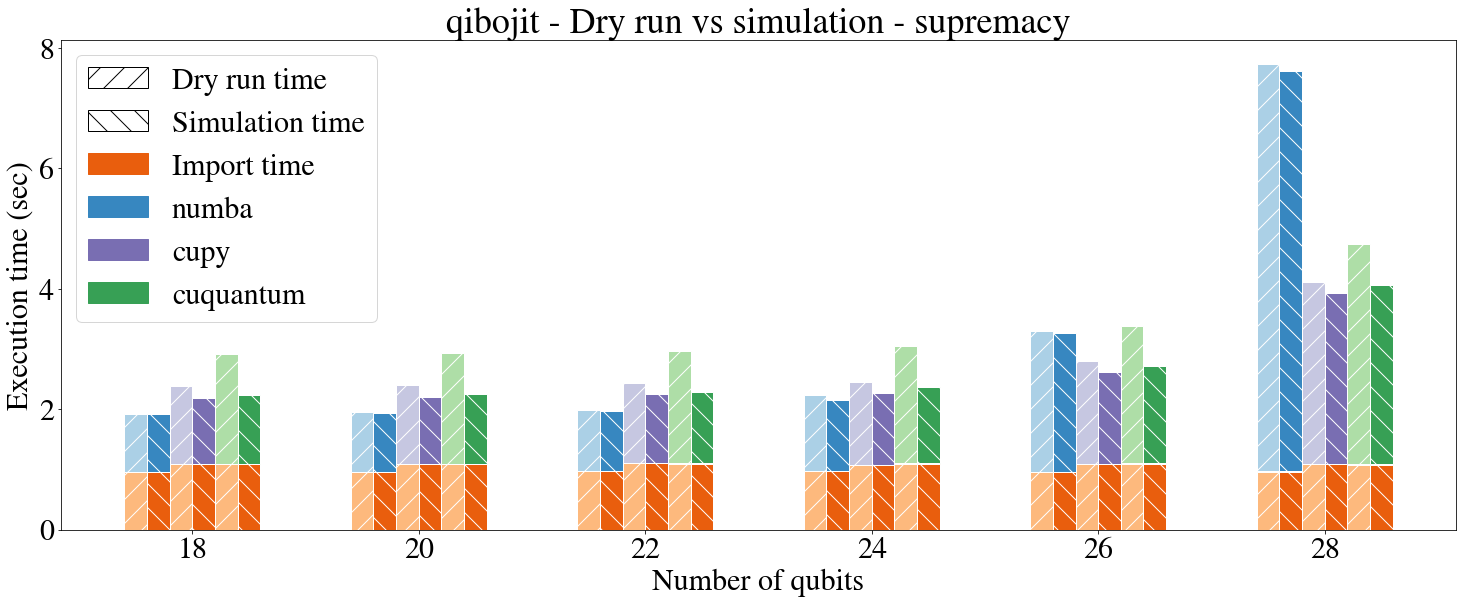

In [2]:
from barplots import plot_breakdown_nqubits

data = load_data(f"./data/qibojit_breakdown.dat")
plot_breakdown_nqubits(data, "supremacy")

## Figure 3

Scaling plots of execution time as a function of the number of qubits for all qibo backends.

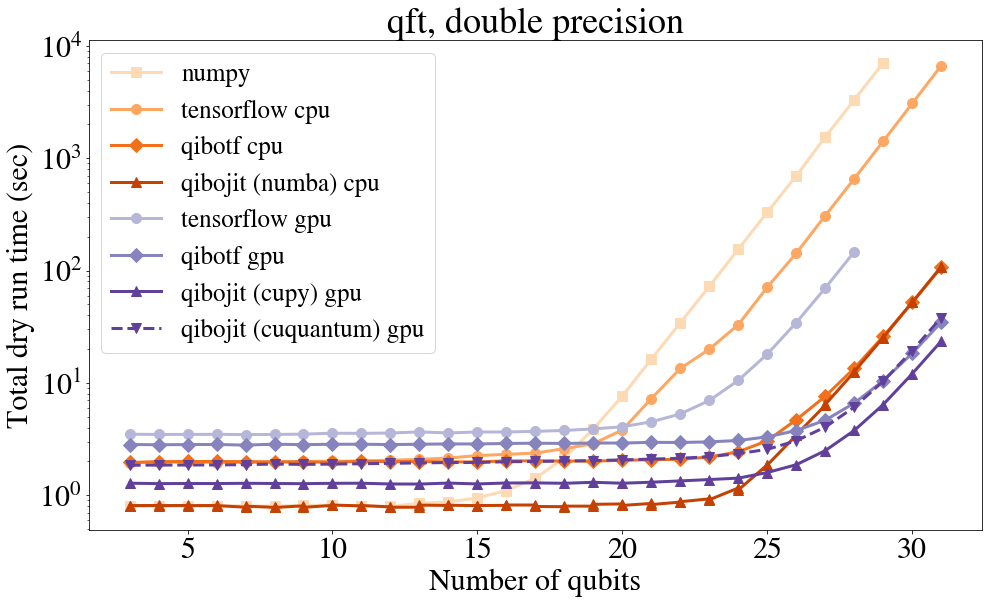

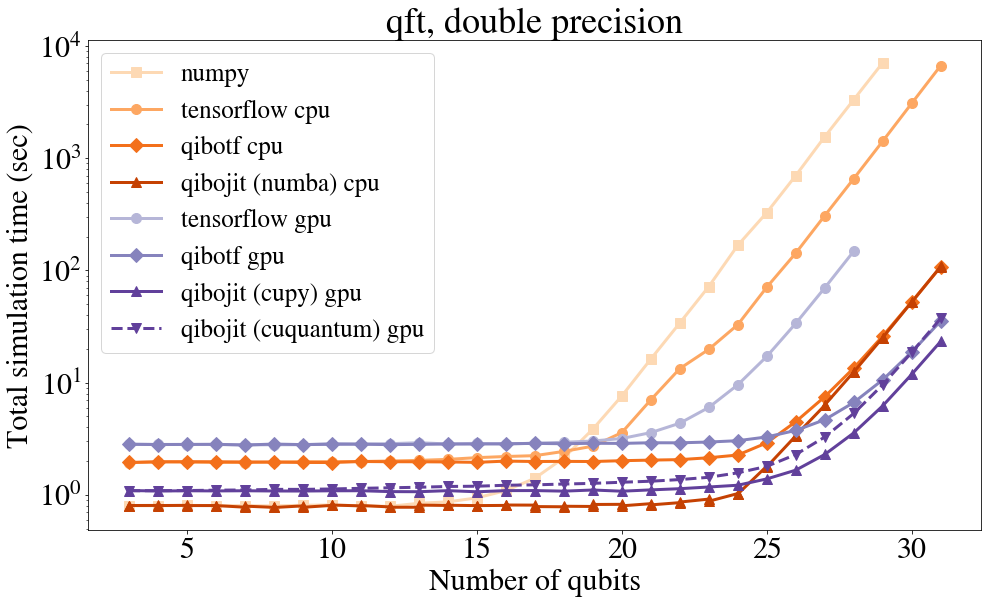

In [3]:
from scaling import plot_scaling

cpu_data = load_data("./data/qibo_scaling_cpu.dat")
gpu_data = load_data("./data/qibo_scaling_gpu.dat")

plot_scaling(cpu_data, gpu_data, "qft", "total_dry_time")
plot_scaling(cpu_data, gpu_data, "qft", "total_simulation_time")

## Figure 4

qibojit backend performance on different CPU and GPU devices.

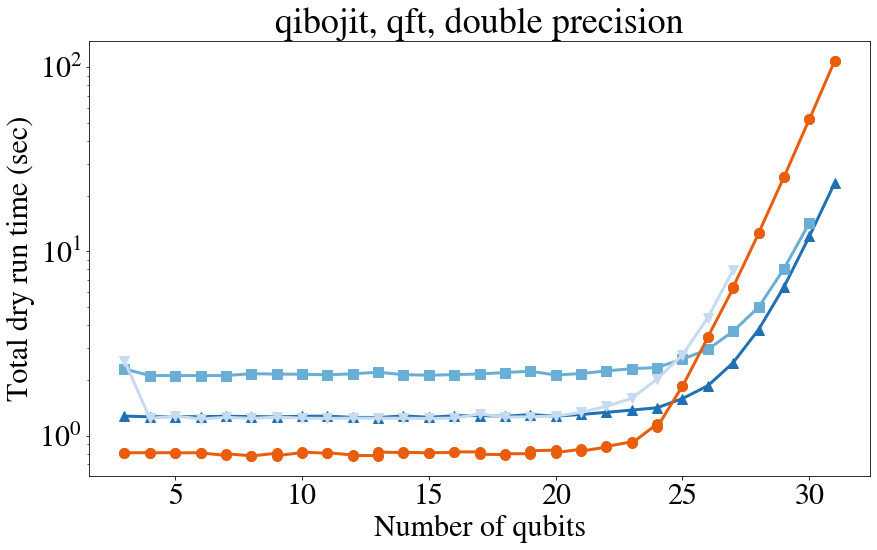

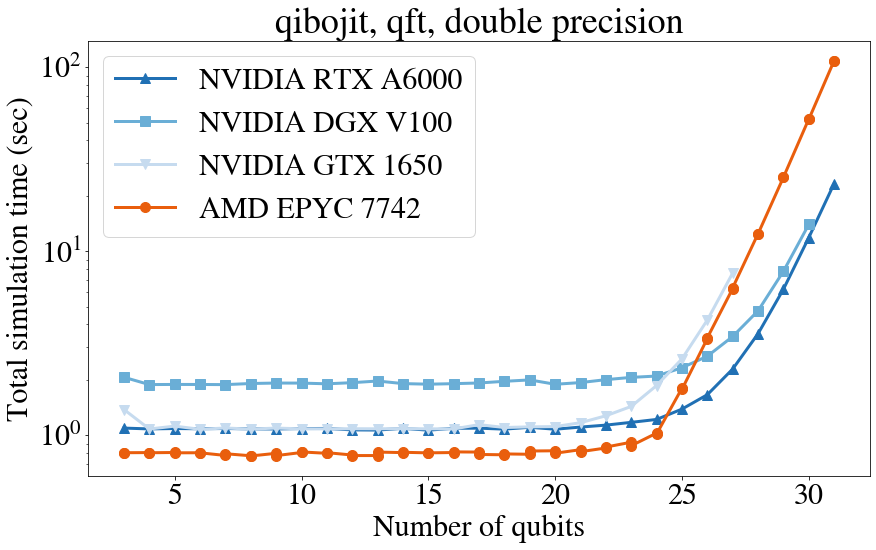

In [4]:
from hardware import plot_hardware

data = {
    "NVIDIA RTX A6000": load_data("./data/qibo_scaling_gpu.dat", qibojit_only=True),
    "NVIDIA DGX V100": load_data("./data/dgx_qibojit.dat", qibojit_only=True),
    "NVIDIA GTX 1650": load_data("./data/gtx1650_qibojit.dat", qibojit_only=True),
    "AMD EPYC 7742": load_data("./data/qibo_scaling_cpu.dat", qibojit_only=True)
}
# filter qibojit-cupy only data if the log file contains more (eg. qibojit-cuquantum)
is_cupy = data["NVIDIA RTX A6000"]["library_options"].apply(lambda x: "cupy" in x)
data["NVIDIA RTX A6000"] = data["NVIDIA RTX A6000"][is_cupy == True]

plot_hardware(data, "qft", "total_dry_time", legend=False)
plot_hardware(data, "qft", "total_simulation_time", legend=True)

## Figure 5

Bar plot with different multigpu configurations and qibojit vs qibotf comparison.

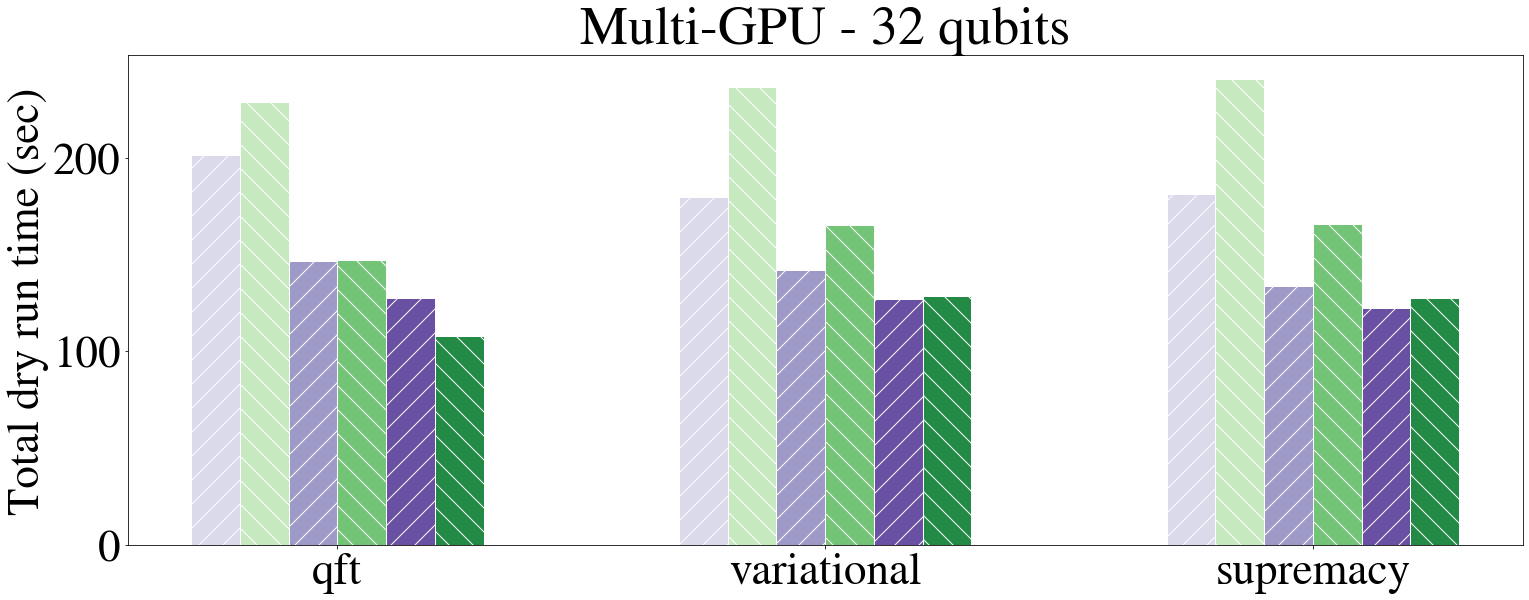

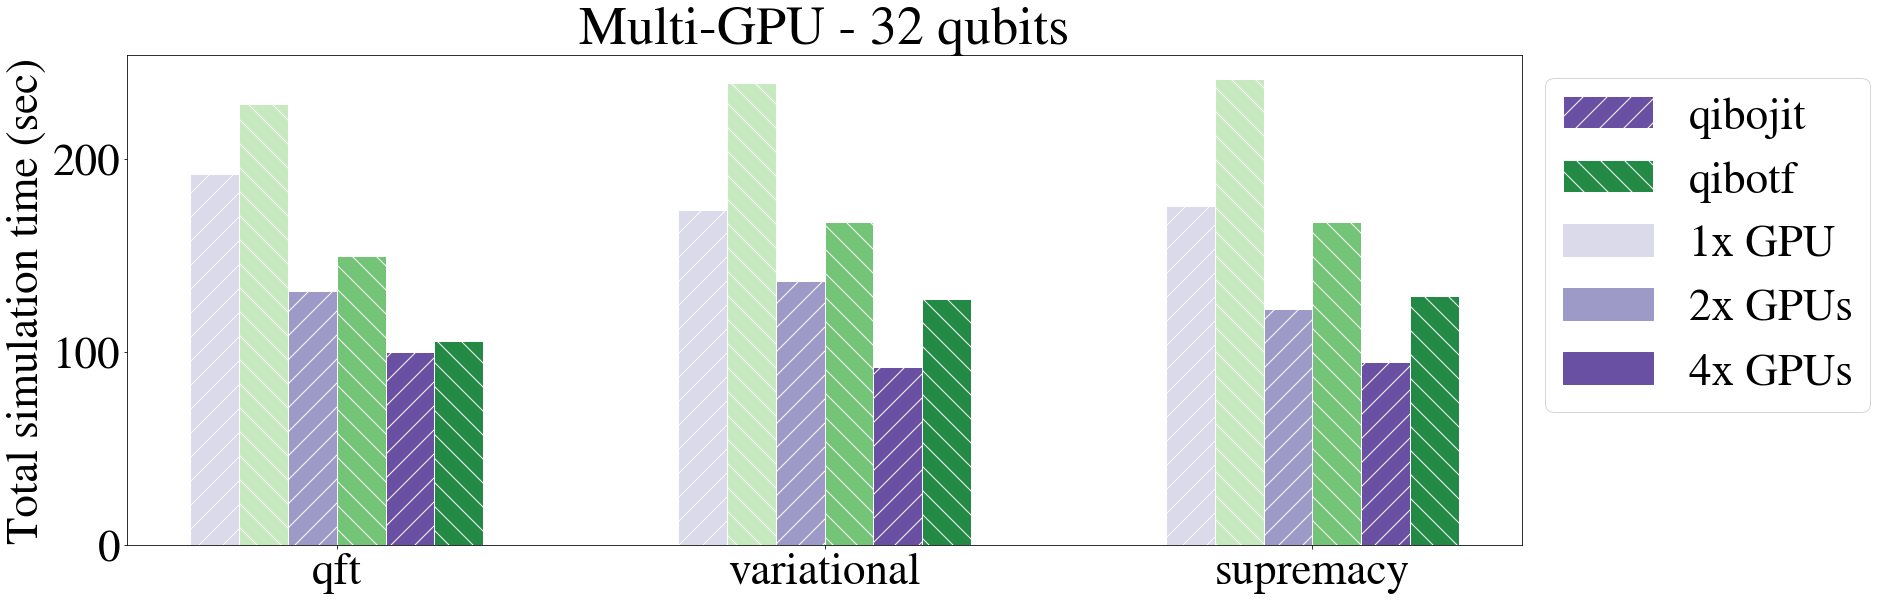

In [5]:
from barplots import plot_multigpu

data = load_data("./data/multigpu.dat")
plot_multigpu(data, 32, "total_dry_time")
plot_multigpu(data, 32, "total_simulation_time", legend=True)

## Figure 6-7

Bar plot with comparisons between different simulation libraries on various circuits.

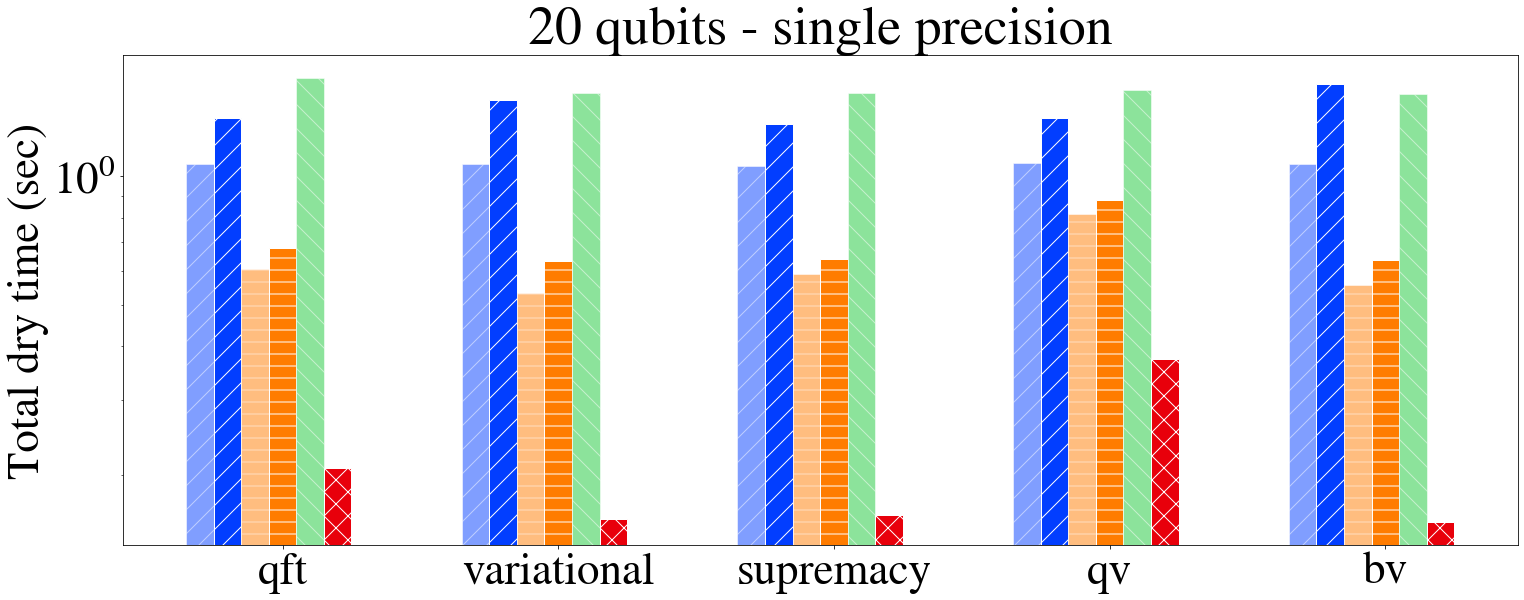

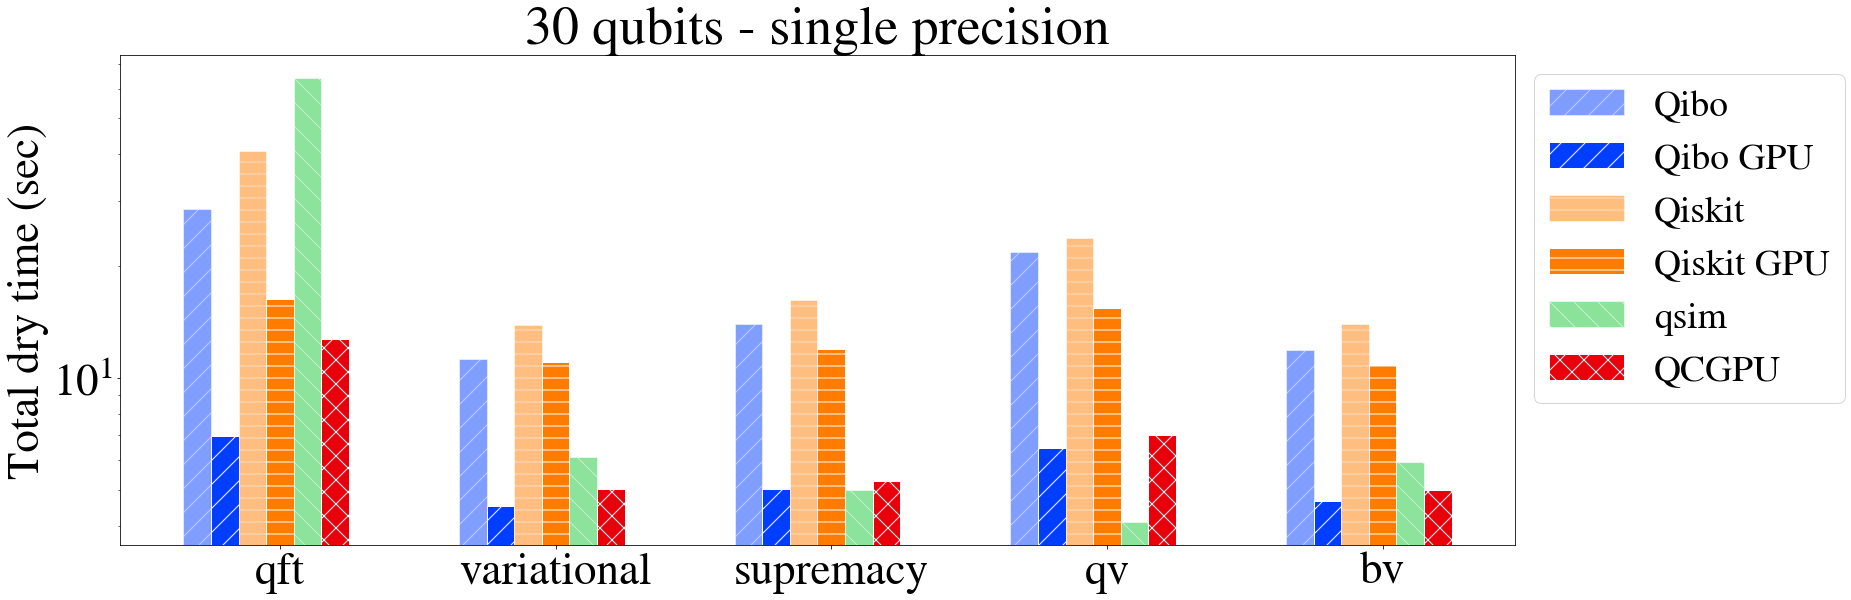

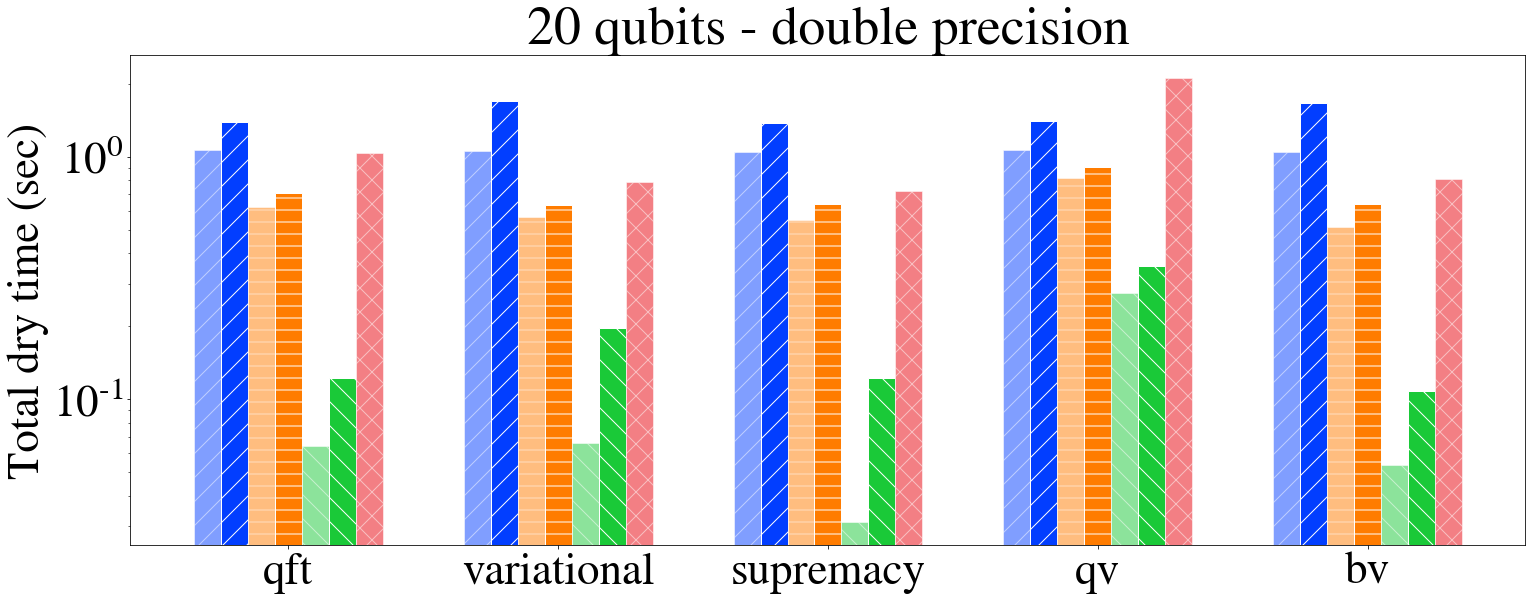

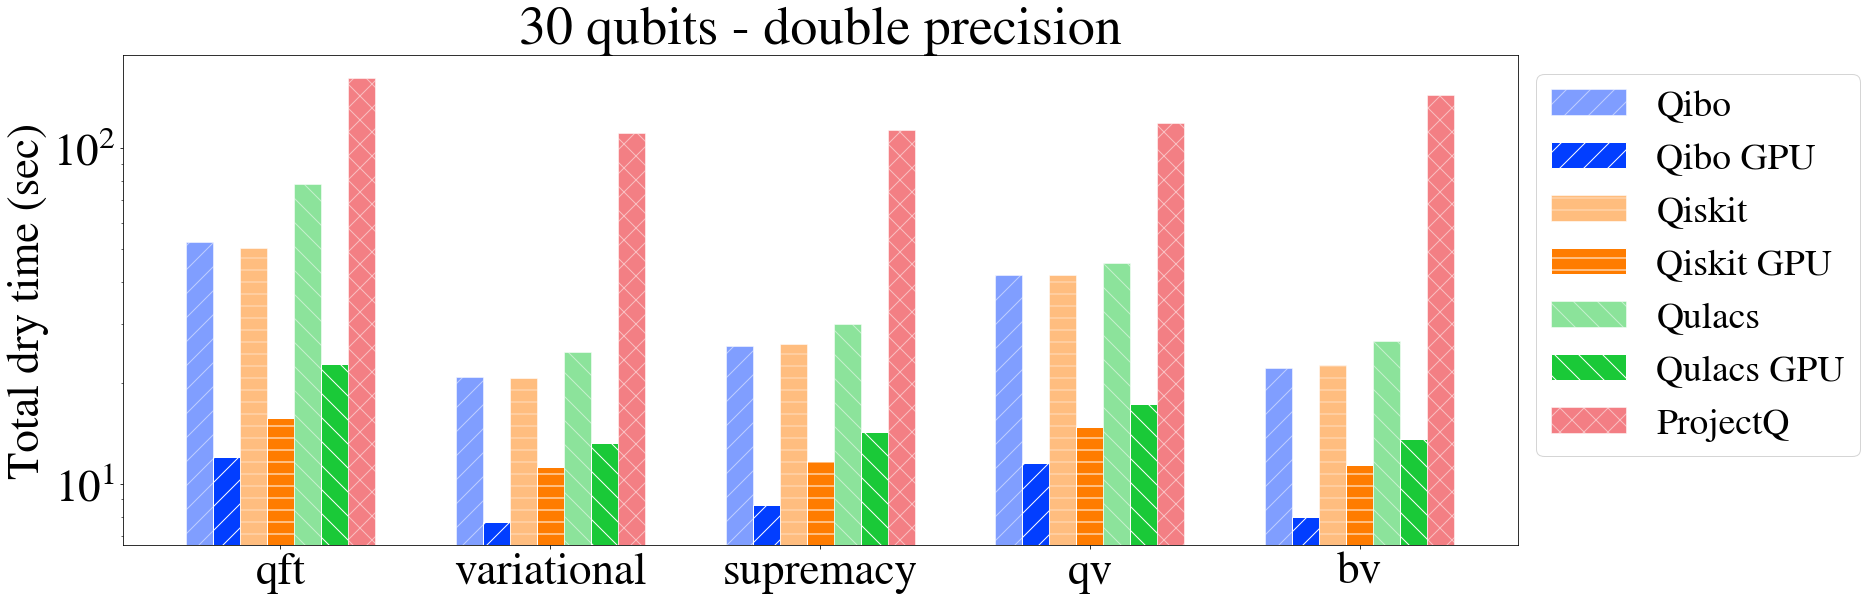

In [6]:
from libraries import plot_libraries_single, plot_libraries_double

cpu_data = load_data("./data/libraries_cpu.dat")
gpu_data = load_data("./data/libraries_gpu.dat")

plot_libraries_single(cpu_data, gpu_data, "total_dry_time", 20, legend=False)
plot_libraries_single(cpu_data, gpu_data, "total_dry_time", 30, legend=True)

plot_libraries_double(cpu_data, gpu_data, "total_dry_time", 20, legend=False)
plot_libraries_double(cpu_data, gpu_data, "total_dry_time", 30, legend=True)